In [1]:
import pandas as pd

# Read the Uber sales 2024 file
uber_sales_2024 = pd.read_csv('uber_sales_2024.csv')

# Display the first few rows of the dataframe
uber_sales_2024.head()

,txn_key,txn_id,src_txn_id,store_num,store_banner,business_date,item_upc_key,item_key,sales_amt,sales_qty,selling_units,actual_sales_prc,total_gross_amt,total_net_amt,total_tax_net_amt,total_tax_sales_amt,sub_total,item_desc,external_reference_id,entry_method,item_upc_cd,item_scan_mod,uuid,categorykey,groupkey,subgroupkey,exported_merchandise_item_sales,exported_merchandise_item_sales_time,exported_polled_register,exported_polled_register_time,exported_polled_sales,exported_polled_sales_time,txn_type,status,data_src_key,txn_level,detail_line_num,store_key
0,e58fe52fe85241549b54a2b37f06d6c5,5583516207,E58FE52F-E852-4154-9B54-A2B37F06D6C5,2522,RaceTrac,2024-07-12,NaN,NaN,30.62,NaN,NaN,30.62,30.62,31.90,1.28,1.28,30.62,NaN,NaN,Digital,NaN,NaN,NaN,NaN,NaN,NaN,True,2024-07-16T16:46:06.112Z,True,2024-07-16T16:46:09.331Z,True,2024-07-16T16:46:07.784Z,Sales,Completed,12,Header,NaN,2377
1,e58fe52fe85241549b54a2b37f06d6c5,5583516207,E58FE52F-E852-4154-9B54-A2B37F06D6C5,2522,RaceTrac,2024-07-12,29322.0,27068.0,9.38,2.0,1.0,9.38,9.38,9.38,0.00,0.00,9.38,5-Hour Energy Grape Extra Strength,414141227606,Digital,4.141412e+11,0.0,NaN,1.0,21.0,139.0,True,2024-07-16T16:46:06.112Z,True,2024-07-16T16:46:09.331Z,True,2024-07-16T16:46:07.784Z,Sales,Completed,12,Detail,1.0,2377
2,e58fe52fe85241549b54a2b37f06d6c5,5583516207,E58FE52F-E852-4154-9B54-A2B37F06D6C5,2522,RaceTrac,2024-07-12,28964.0,5450.0,5.78,2.0,1.0,5.78,5.78,6.13,0.35,0.35,5.78,"Lipton Pure Leaf Tea Extra Sweet, 18.5oz",414141224049,Digital,4.141412e+11,0.0,NaN,2.0,2.0,210.0,True,2024-07-16T16:46:06.112Z,True,2024-07-16T16:46:09.331Z,True,2024-07-16T16:46:07.784Z,Sales,Completed,12,Detail,2.0,2377
3,e58fe52fe85241549b54a2b37f06d6c5,5583516207,E58FE52F-E852-4154-9B54-A2B37F06D6C5,2522,RaceTrac,2024-07-12,28673.0,6692.0,3.49,1.0,1.0,3.49,3.49,3.70,0.21,0.21,3.49,Monster Energy Ultra (16 oz),414141221130,Digital,4.141412e+11,0.0,NaN,2.0,2.0,219.0,True,2024-07-16T16:46:06.112Z,True,2024-07-16T16:46:09.331Z,True,2024-07-16T16:46:07.784Z,Sales,Completed,12,Detail,3.0,2377
4,e58fe52fe85241549b54a2b37f06d6c5,5583516207,E58FE52F-E852-4154-9B54-A2B37F06D6C5,2522,RaceTrac,2024-07-12,28674.0,28884.0,11.97,3.0,1.0,11.97,11.97,12.69,0.72,0.72,11.97,Red Bull (12 oz),414141221147,Digital,4.141412e+11,0.0,NaN,2.0,2.0,219.0,True,2024-07-16T16:46:06.112Z,True,2024-07-16T16:46:09.331Z,True,2024-07-16T16:46:07.784Z,Sales,Completed,12,Detail,4.0,2377


In [2]:
# Select the required columns for predicting sales and status
required_columns = [
    "txn_id", "store_num", "business_date", "sales_amt", "sales_qty", 
    "selling_units", "actual_sales_prc", "total_gross_amt", "total_net_amt", 
    "total_tax_net_amt", "total_tax_sales_amt", "sub_total", "status"
]

# Create a new dataframe with only the required columns
uber_sales_2024_filtered = uber_sales_2024[required_columns]

# Display the first few rows of the filtered dataframe
uber_sales_2024_filtered.head()

,txn_id,store_num,business_date,sales_amt,sales_qty,selling_units,actual_sales_prc,total_gross_amt,total_net_amt,total_tax_net_amt,total_tax_sales_amt,sub_total,status
0,5583516207,2522,2024-07-12,30.62,NaN,NaN,30.62,30.62,31.90,1.28,1.28,30.62,Completed
1,5583516207,2522,2024-07-12,9.38,2.0,1.0,9.38,9.38,9.38,0.00,0.00,9.38,Completed
2,5583516207,2522,2024-07-12,5.78,2.0,1.0,5.78,5.78,6.13,0.35,0.35,5.78,Completed
3,5583516207,2522,2024-07-12,3.49,1.0,1.0,3.49,3.49,3.70,0.21,0.21,3.49,Completed
4,5583516207,2522,2024-07-12,11.97,3.0,1.0,11.97,11.97,12.69,0.72,0.72,11.97,Completed


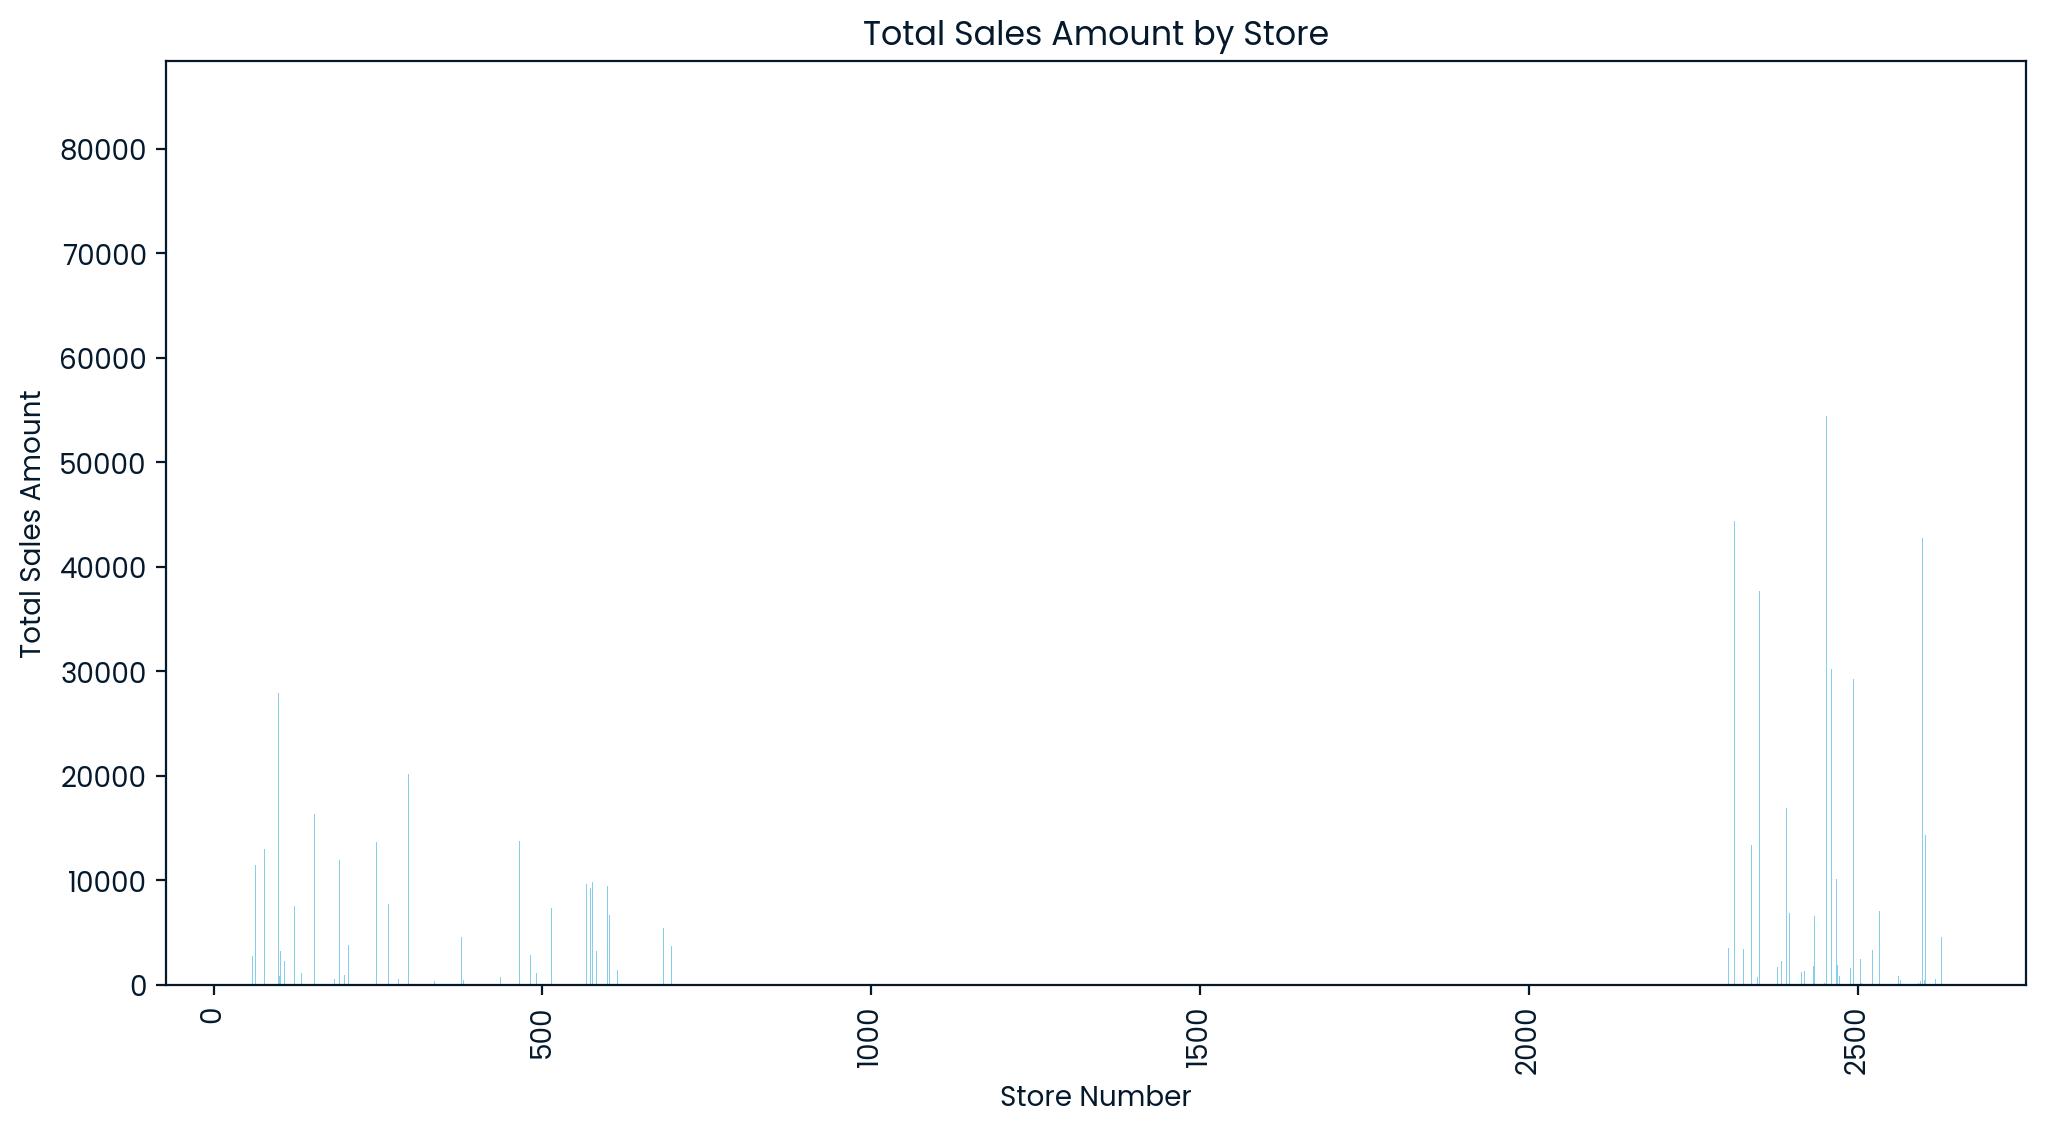

store_num      490.00
sales_amt    84199.45
Name: 50, dtype: float64

In [3]:
import matplotlib.pyplot as plt

# Group by store_num and sum the sales_amt to find the total sales per store
store_sales = uber_sales_2024_filtered.groupby('store_num')['sales_amt'].sum().reset_index()

# Find the store with the highest sales
highest_sales_store = store_sales.loc[store_sales['sales_amt'].idxmax()]

# Plot the total sales per store
plt.figure(figsize=(12, 6))
plt.bar(store_sales['store_num'], store_sales['sales_amt'], color='skyblue')
plt.xlabel('Store Number')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Store')
plt.xticks(rotation=90)

# Highlight the store with the highest sales
plt.bar(highest_sales_store['store_num'], highest_sales_store['sales_amt'], color='red')

plt.show()

# Display the store with the highest sales
highest_sales_store

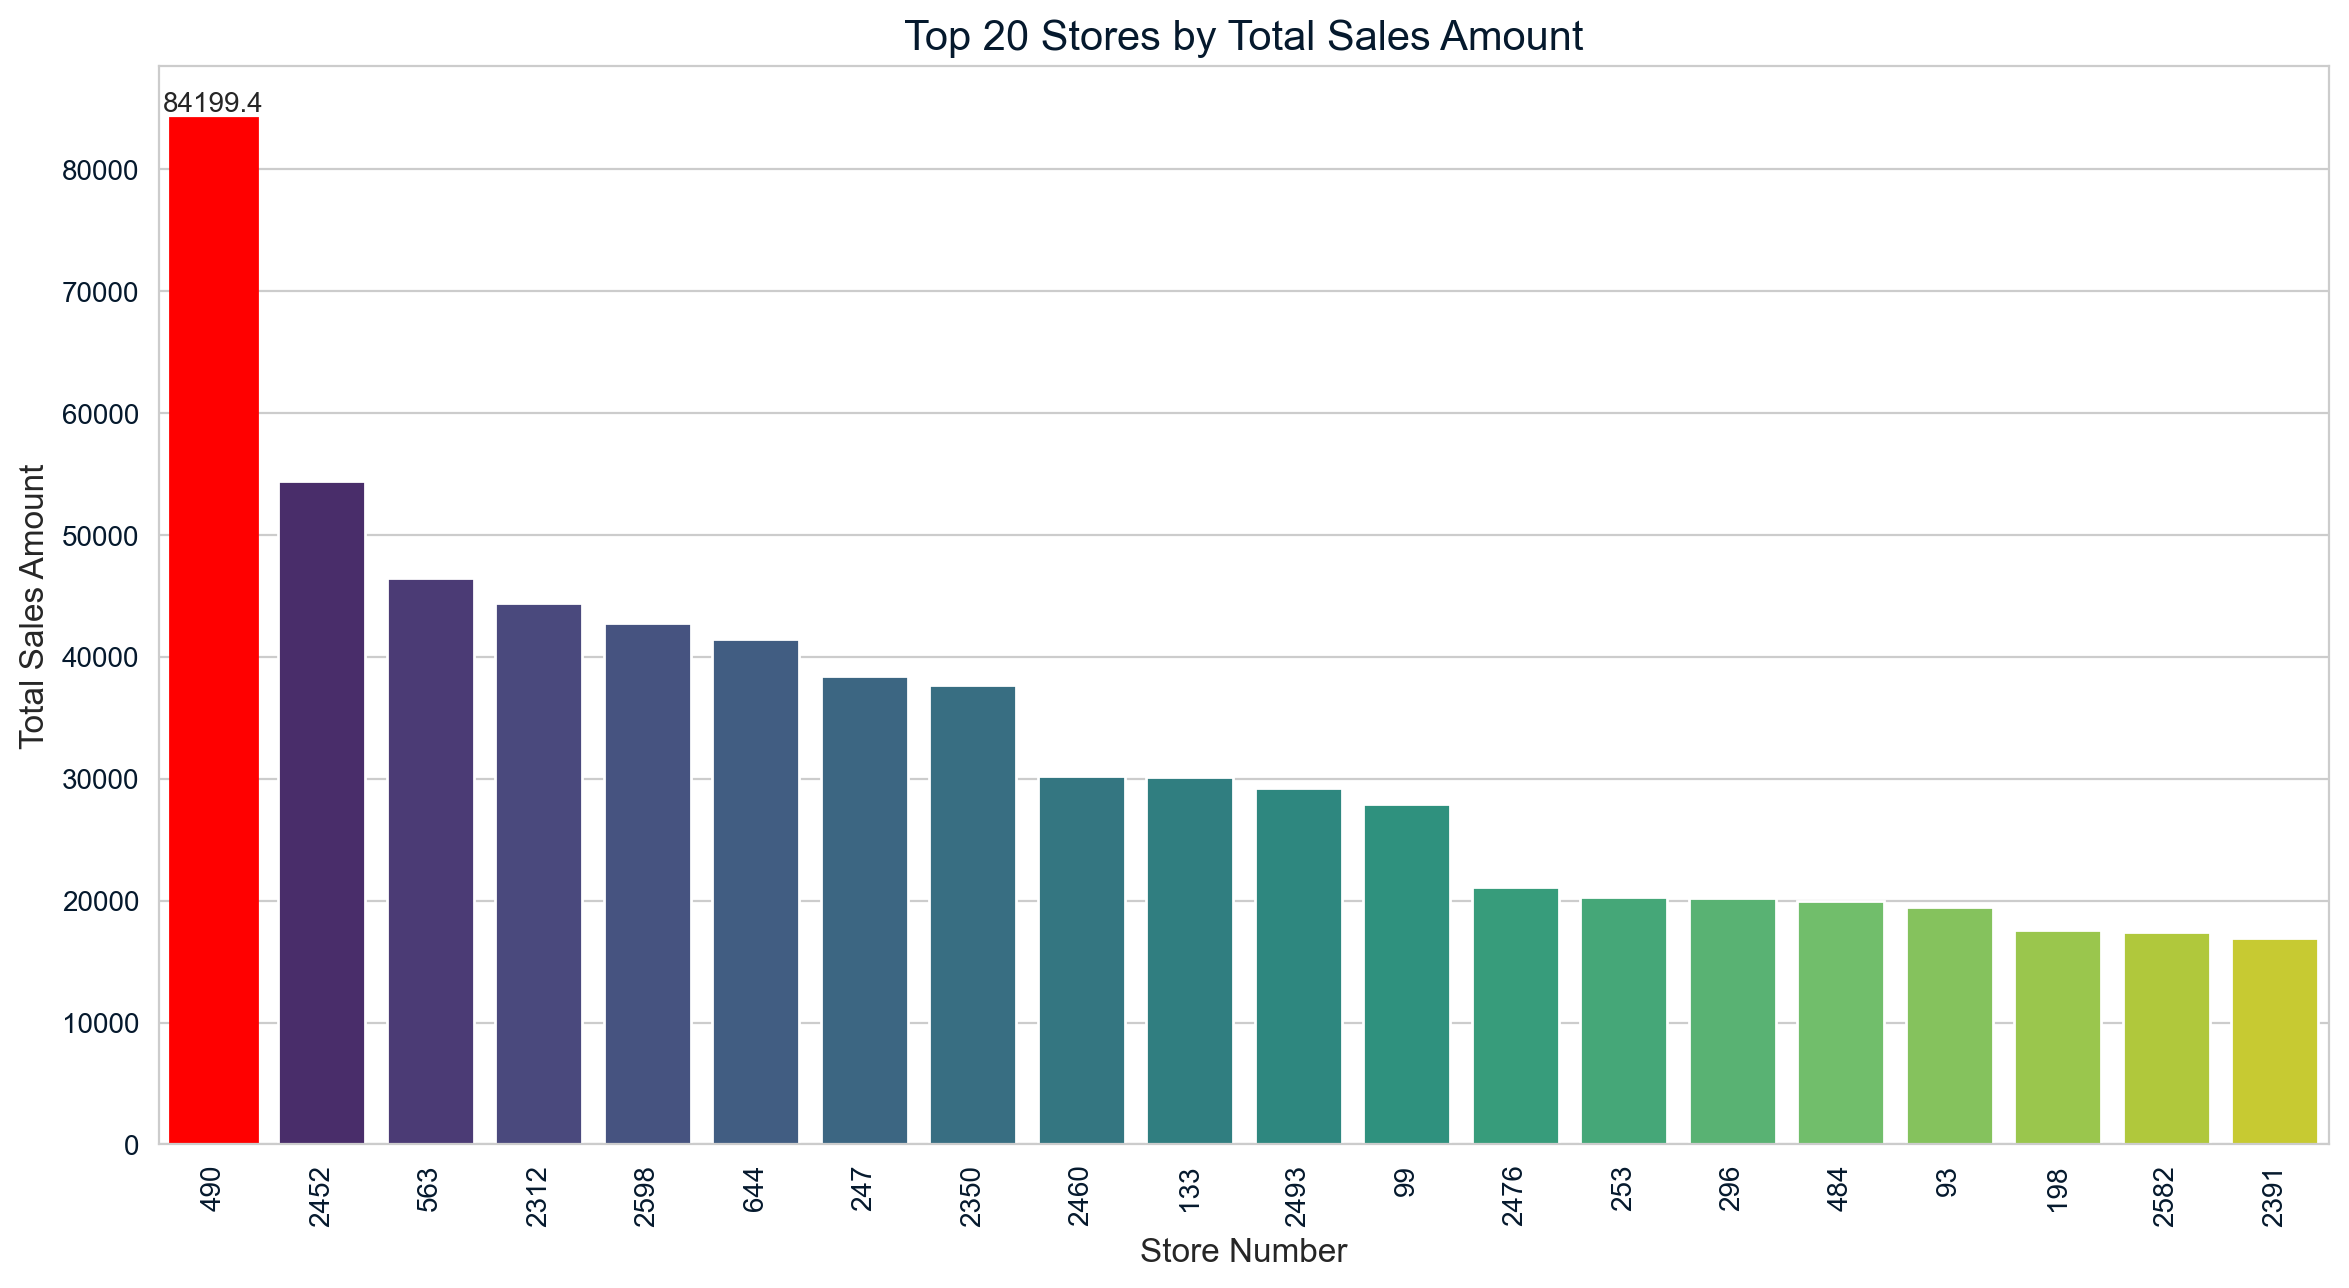

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sort the stores by sales amount and select the top 20 stores
top_20_stores = store_sales.sort_values(by='sales_amt', ascending=False).head(20)

# Create a bar plot for total sales of the top 20 stores
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x='store_num', y='sales_amt', data=top_20_stores, palette='viridis', order=top_20_stores['store_num'])

# Highlight the store with the highest sales
bar_plot.bar_label(bar_plot.containers[0], label_type='edge')

# Find the index of the store with the highest sales in the top 20 stores
max_sales_index = top_20_stores['sales_amt'].idxmax()
# Find the corresponding patch index in the bar plot
patch_index = top_20_stores.index.get_loc(max_sales_index)
bar_plot.patches[patch_index].set_color('red')

# Set plot labels and title
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.title('Top 20 Stores by Total Sales Amount', fontsize=15)
plt.xticks(rotation=90)

plt.show()

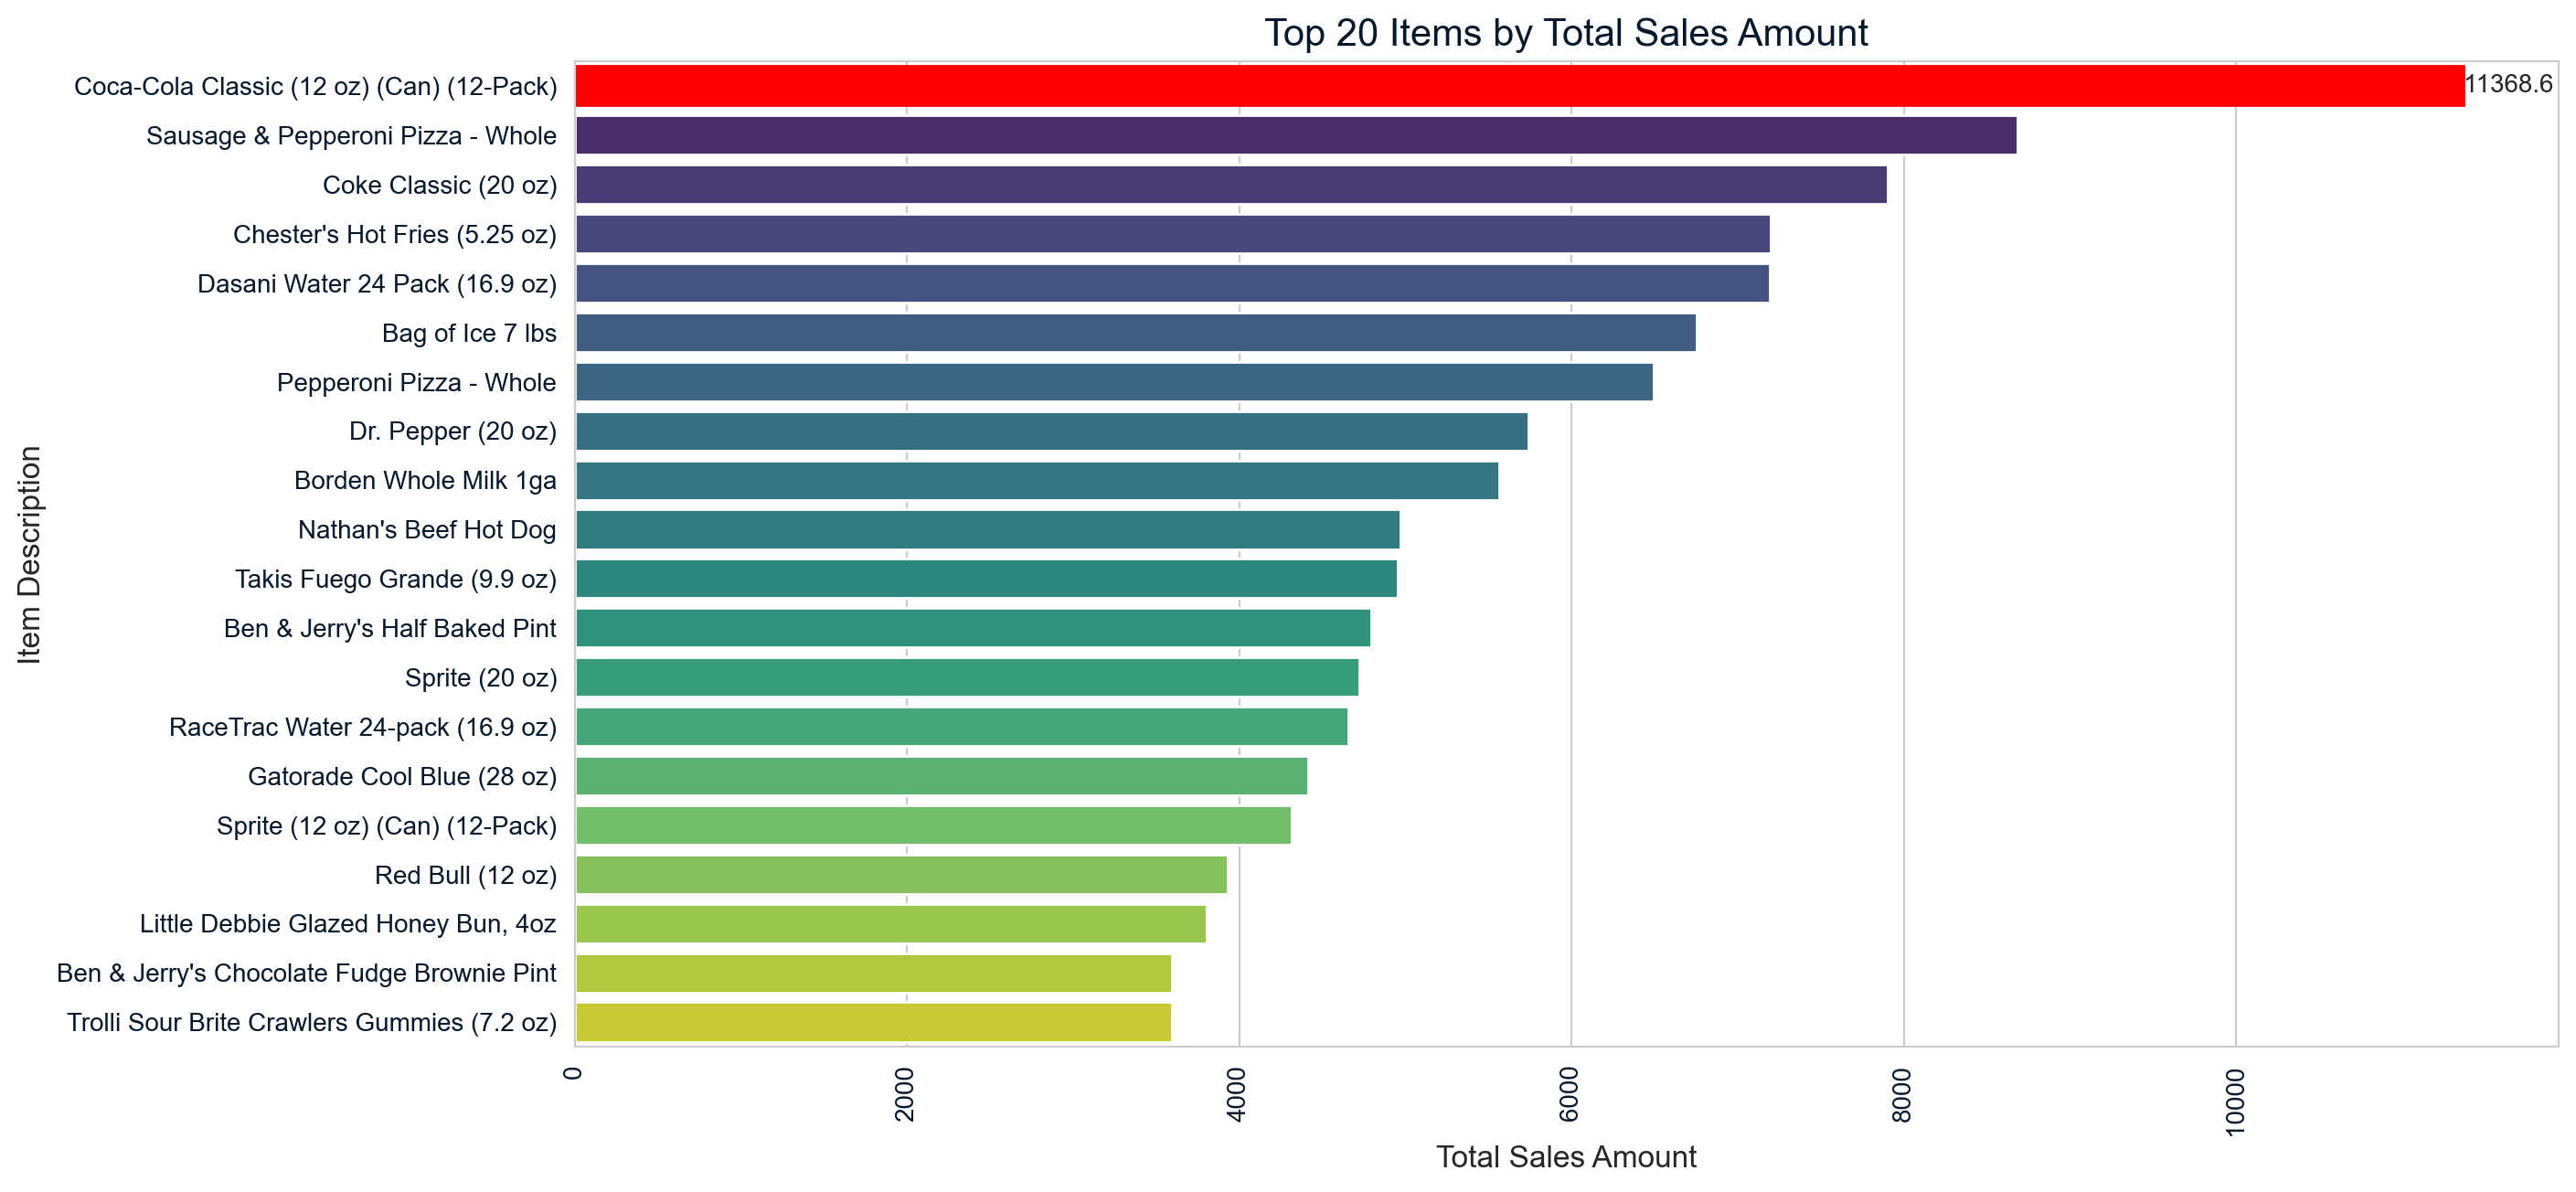

In [10]:
# Group the sales data by item and sum the sales amount for each item
item_sales = uber_sales_2024.groupby('item_desc')['sales_amt'].sum().reset_index()

# Sort the items by sales amount and select the top 20 items
top_20_items = item_sales.sort_values(by='sales_amt', ascending=False).head(20)

# Create a bar plot for total sales of the top 20 items
plt.figure(figsize=(14, 7))
item_bar_plot = sns.barplot(x='sales_amt', y='item_desc', data=top_20_items, palette='viridis')

# Highlight the item with the highest sales
item_bar_plot.bar_label(item_bar_plot.containers[0], label_type='edge')

# Find the index of the item with the highest sales in the top 20 items
max_item_sales_index = top_20_items['sales_amt'].idxmax()
# Find the corresponding patch index in the bar plot
item_patch_index = top_20_items.index.get_loc(max_item_sales_index)
item_bar_plot.patches[item_patch_index].set_color('red')

# Set plot labels and title
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Item Description', fontsize=12)
plt.title('Top 20 Items by Total Sales Amount', fontsize=15)
plt.xticks(rotation=90)

plt.show()

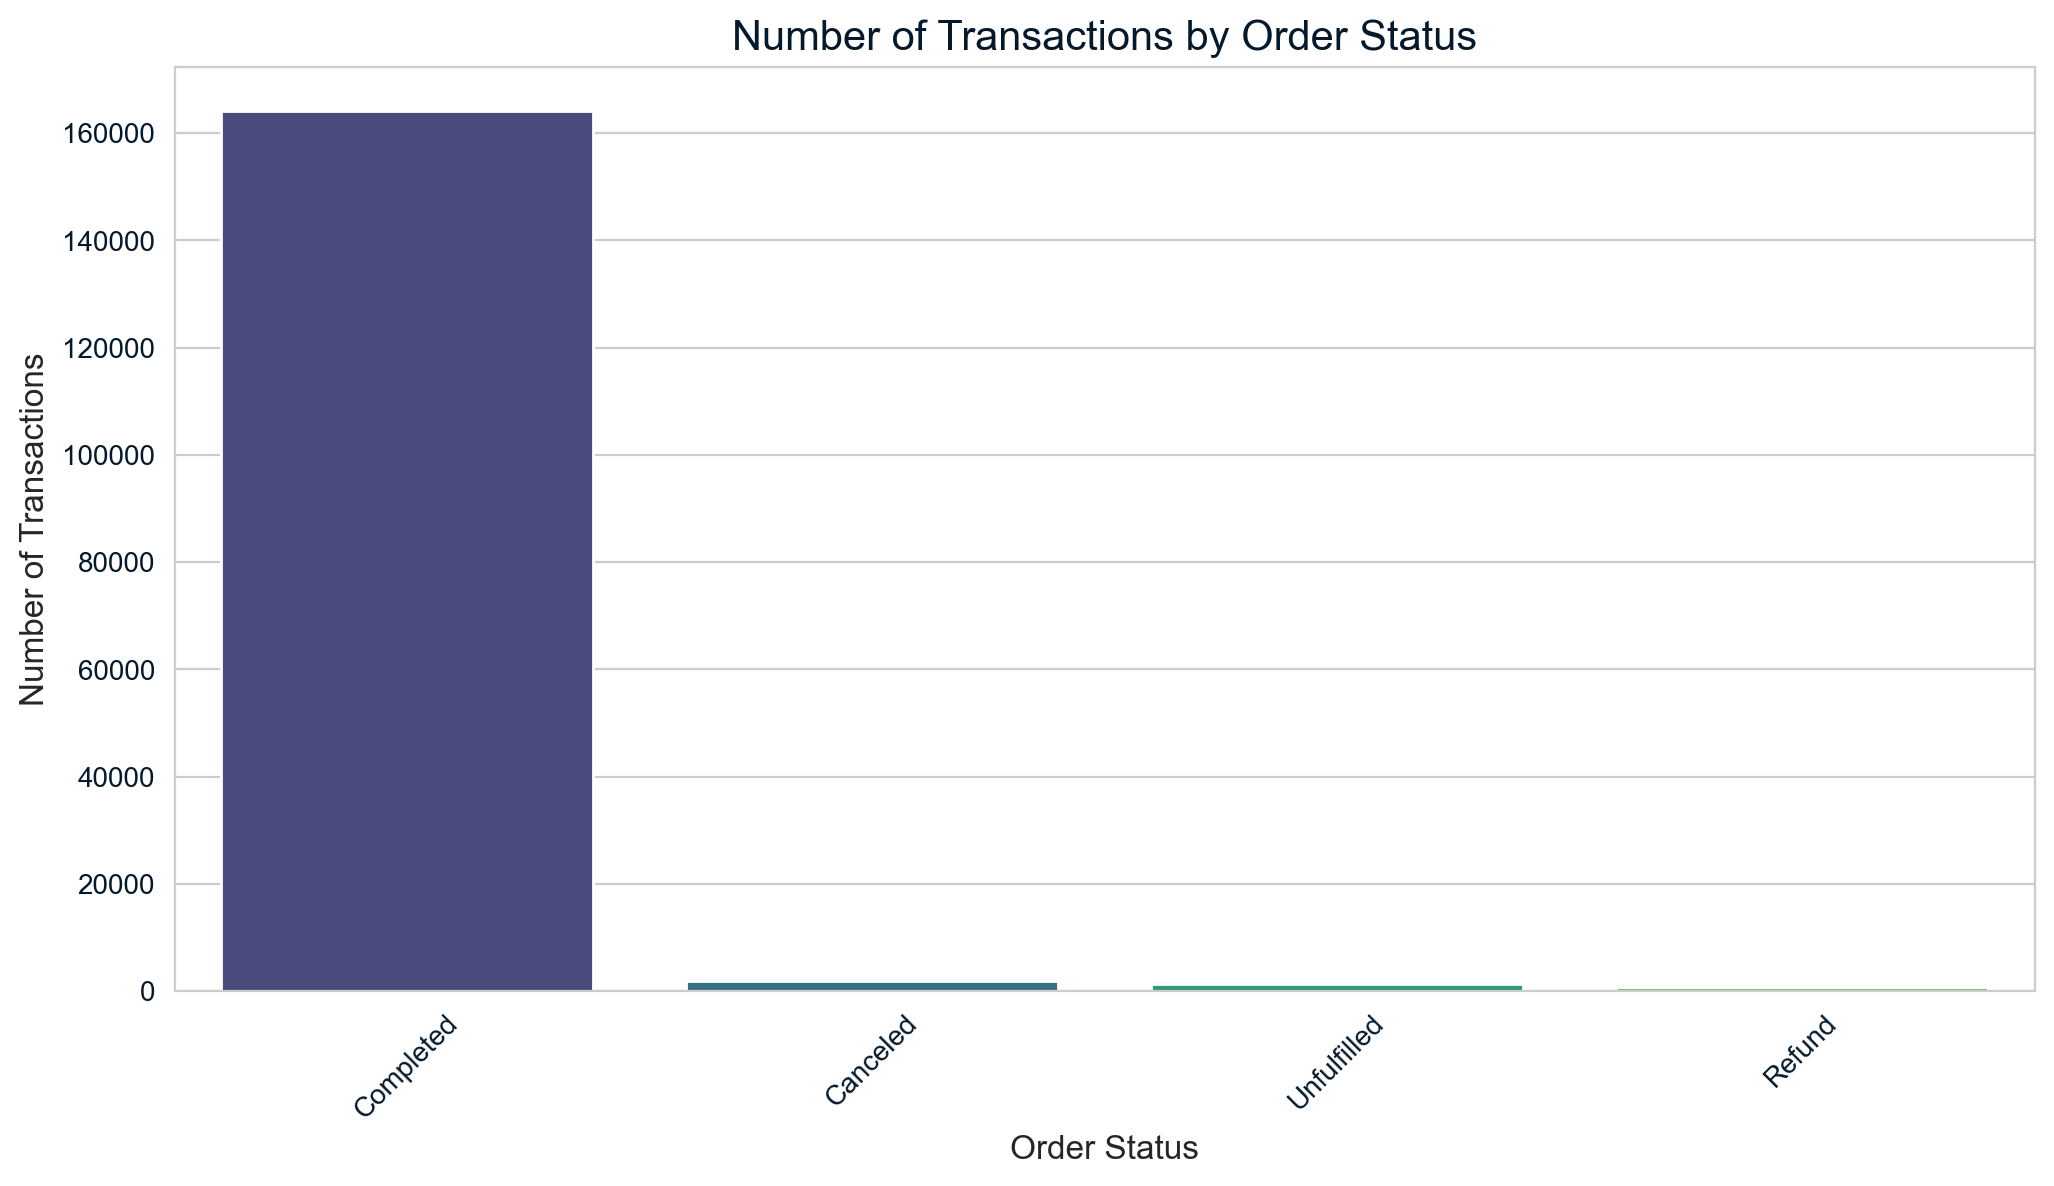

In [11]:
# Group the sales data by order status and count the number of transactions for each status
order_status_counts = uber_sales_2024['status'].value_counts().reset_index()
order_status_counts.columns = ['status', 'count']

# Create a bar plot to visualize the number of transactions for each order status
plt.figure(figsize=(12, 6))
status_bar_plot = sns.barplot(x='status', y='count', data=order_status_counts, palette='viridis')

# Set plot labels and title
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Transactions by Order Status', fontsize=15)
plt.xticks(rotation=45)

plt.show()

<Figure size 1400x800 with 0 Axes>

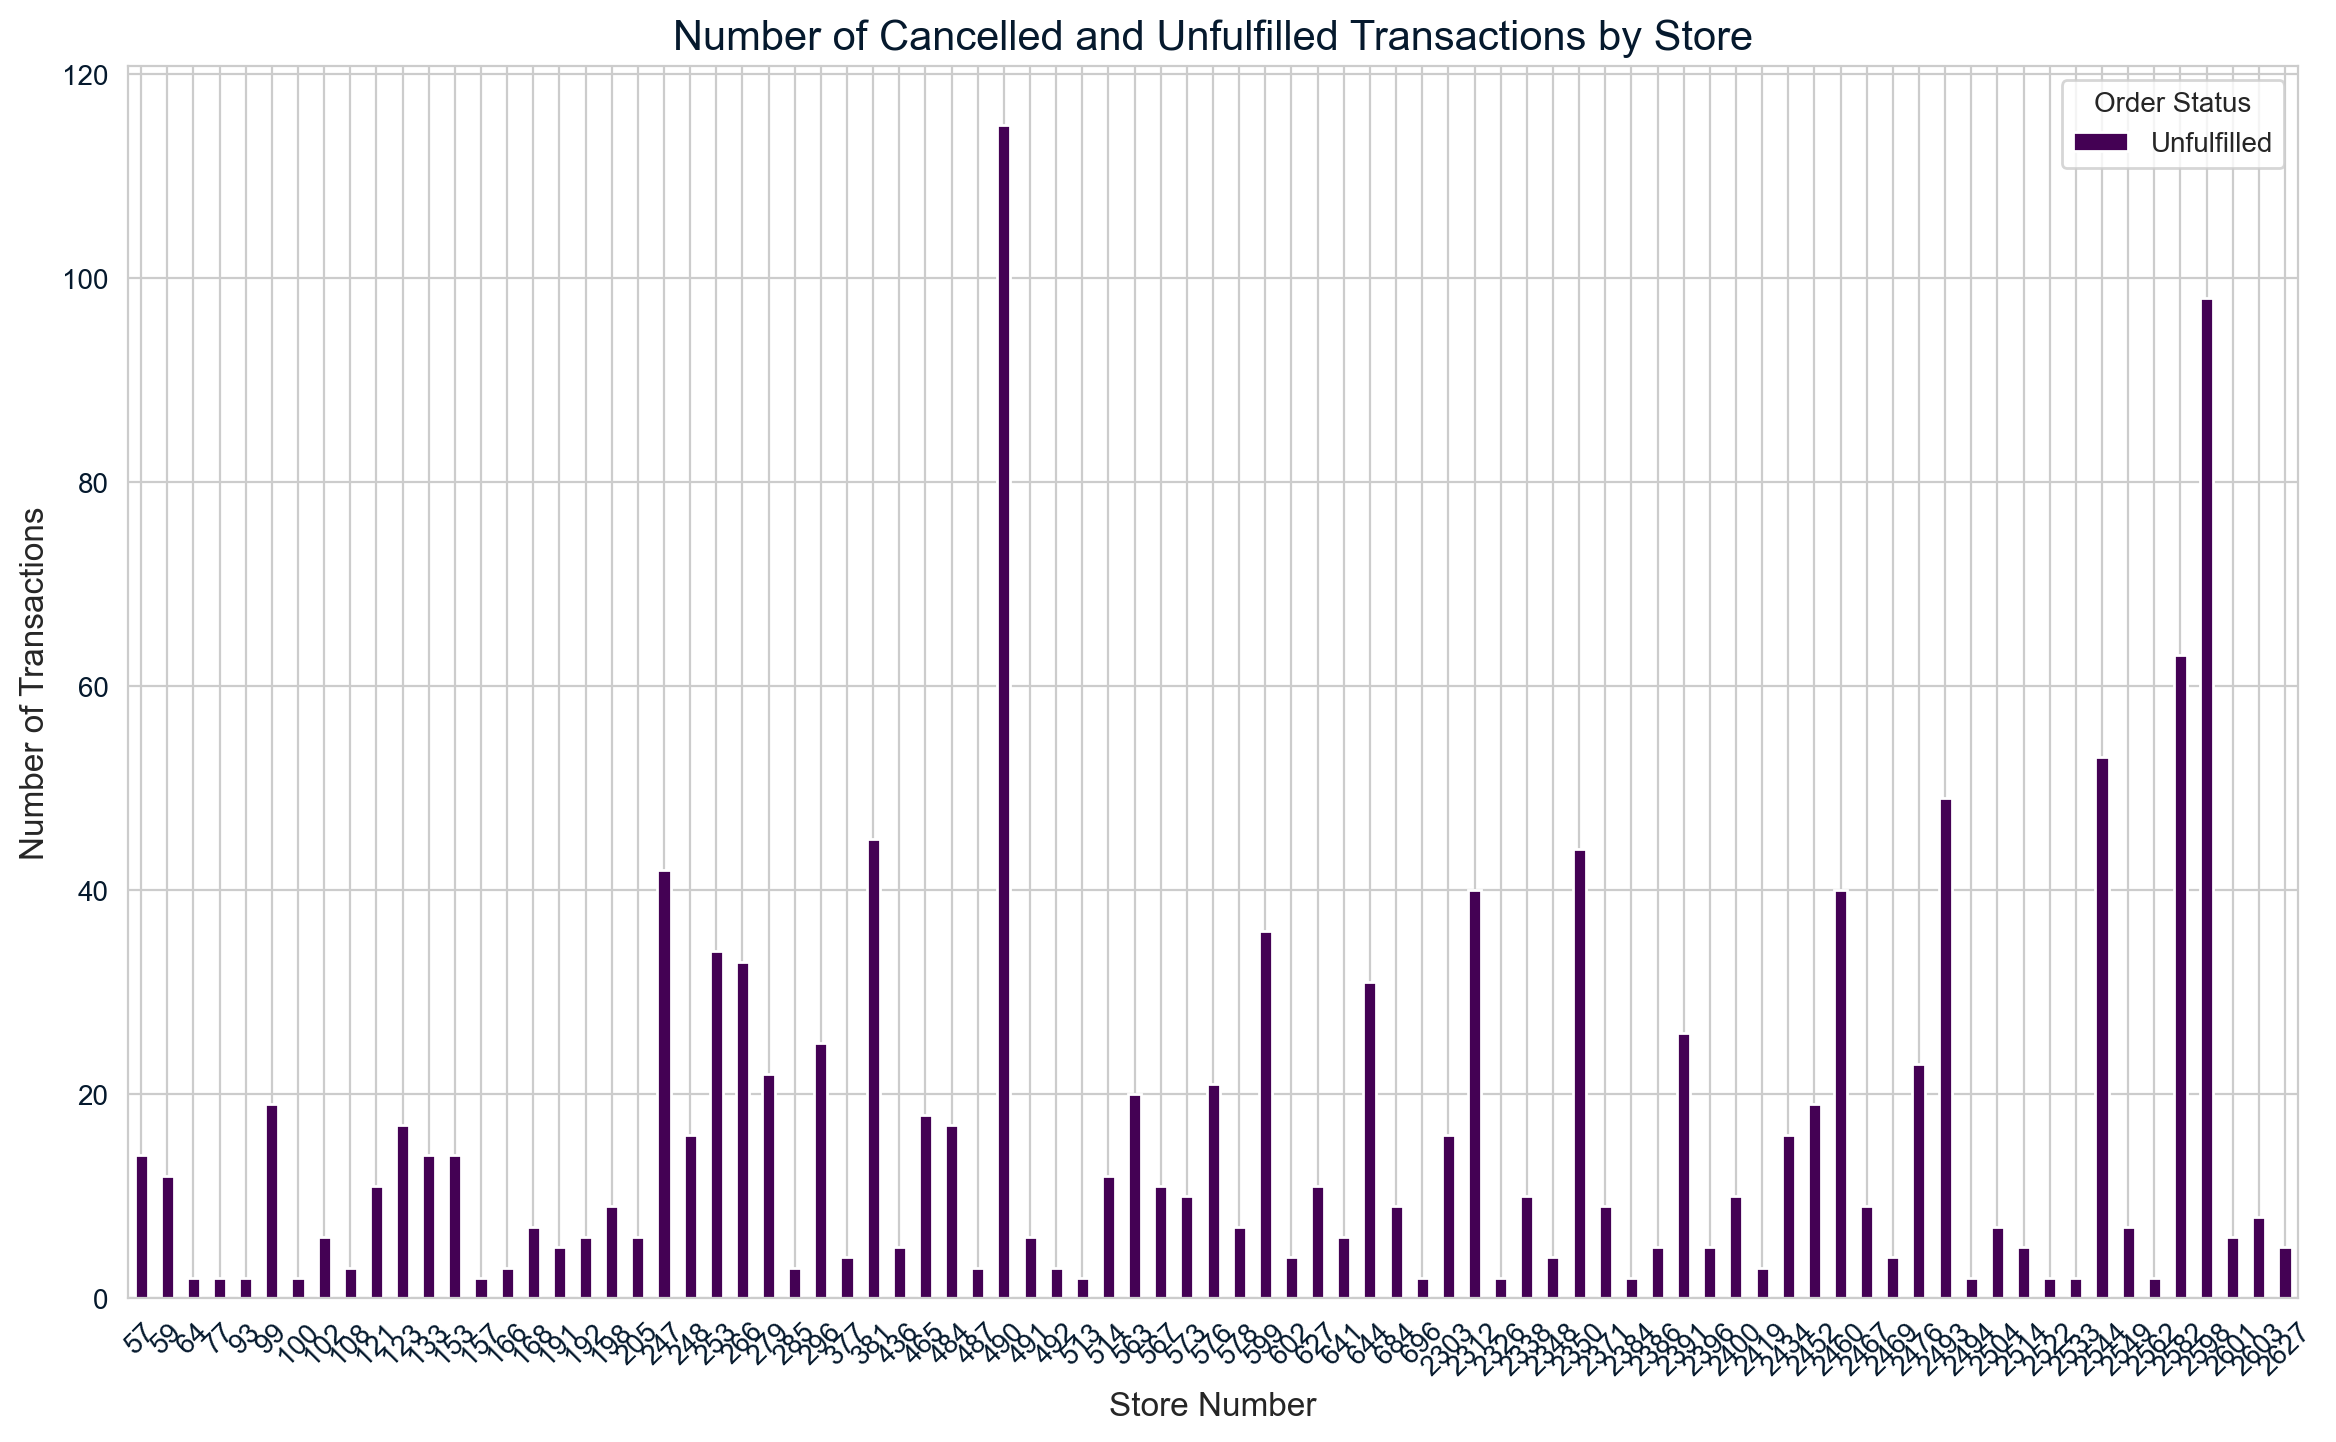

In [12]:
# Filter the sales data for cancelled and unfulfilled orders
cancelled_unfulfilled_orders = uber_sales_2024[uber_sales_2024['status'].isin(['Cancelled', 'Unfulfilled'])]

# Group the data by store number and order status, and count the number of transactions for each group
store_status_counts = cancelled_unfulfilled_orders.groupby(['store_num', 'status']).size().reset_index(name='count')

# Create a pivot table to reshape the data for visualization
store_status_pivot = store_status_counts.pivot(index='store_num', columns='status', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(14, 8))
store_status_plot = store_status_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))

# Set plot labels and title
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Cancelled and Unfulfilled Transactions by Store', fontsize=15)
plt.xticks(rotation=45)

plt.legend(title='Order Status')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Prepare the data for modeling
# Create a binary target variable: 1 if status is 'Cancelled' or 'Unfulfilled', 0 otherwise
uber_sales_2024['target'] = uber_sales_2024['status'].apply(lambda x: 1 if x in ['Cancelled', 'Unfulfilled'] else 0)

# Select features for the model
features = ['store_num', 'sales_amt', 'sales_qty', 'selling_units', 'total_gross_amt', 'total_net_amt', 'total_tax_net_amt', 'total_tax_sales_amt', 'sub_total']
X = uber_sales_2024[features]
y = uber_sales_2024['target']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict the stores which will have cancelled and unfulfilled transactions
uber_sales_2024['predicted_target'] = clf.predict(imputer.transform(uber_sales_2024[features]))

# Filter the stores with predicted cancelled and unfulfilled transactions
predicted_cancelled_unfulfilled_stores = uber_sales_2024[uber_sales_2024['predicted_target'] == 1]['store_num'].unique()

predicted_cancelled_unfulfilled_stores

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     50463
           1       0.06      0.01      0.01       385

    accuracy                           0.99     50848
   macro avg       0.53      0.50      0.50     50848
weighted avg       0.99      0.99      0.99     50848



array([ 602,  644, 2598, 2582,  198, 2544,  490,  491,  100,  123, 2391,
        641,  377, 2434,  684, 2549,  133,   57, 2312,  465, 2460, 2452,
       2400,  381, 2493, 2303,  567, 2419, 2601, 2350,  285,  492,  192,
        279,  266, 2514, 2522, 2467,  168,  253,  296,  576, 2476, 2386,
       2326,  102,  484,  248,  627,  205,  696,  487,  153, 2469,  247,
        578,  599,  191,  514,   59,  121,  157, 2371, 2396,   99, 2533,
        436])